In [23]:
import pandas as pd
#https://www.kaggle.com/datasets/zain280/titanic-data-set
df = pd.read_csv("./dataset/train.csv")#, on_bad_lines='skip')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:

#usual commands to start looking at the dataset 
print(df["Sex"].value_counts(dropna=False))
#df[df['latitude'].isna()].index
df.info()
nan_rate = df.isna().mean() * 100
print(nan_rate)
#print(df.isna().sum())

Sex
male      577
female    314
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch      

In [25]:
df["Sex"] = df["Sex"].str.lower().map({"female": 0, "male": 1})
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


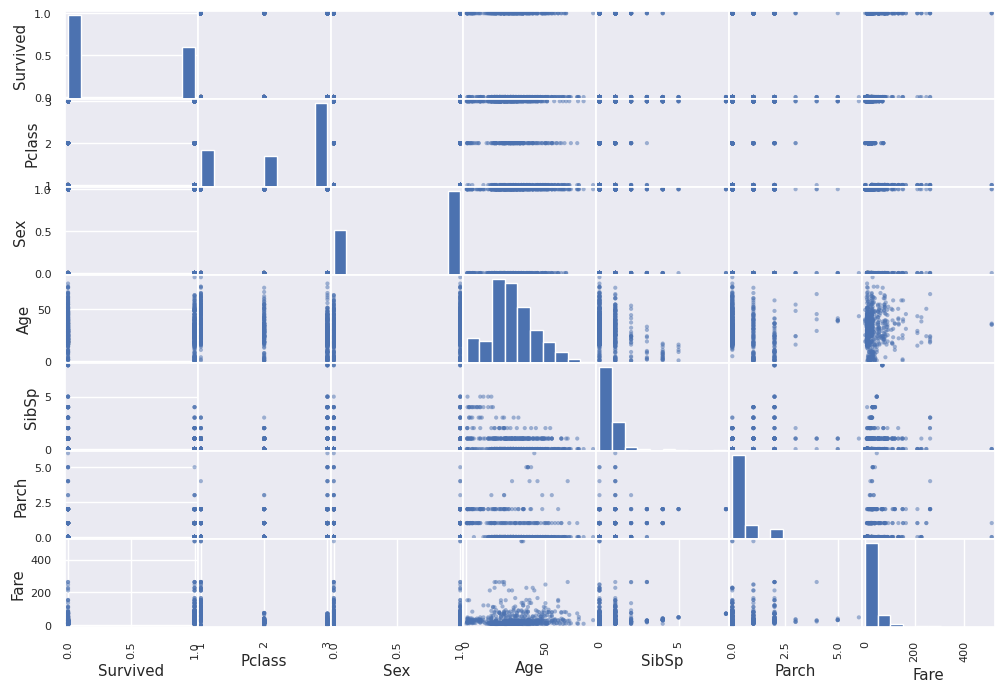

In [26]:
#any visual obvious correlation
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
attributes = ["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Cabin"]
scatter_matrix(df[attributes], figsize=(12, 8))
plt.show()

In [27]:
#analyse correlation for the price (valeur_fonciere) vs other features
corr_matrix=df.corr(numeric_only=True)
corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Sex           -0.543351
Name: Survived, dtype: float64

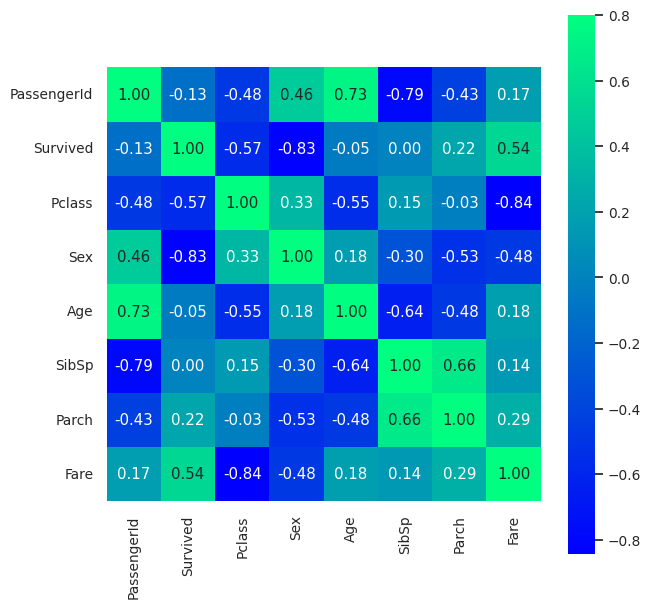

In [ ]:
import seaborn as sns
df_corr=df.corr(numeric_only=True)
df_corr.drop(columns=['PassengerId'], inplace=True)
corr_matrix=df_corr.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(7,7))
sns.set_theme(font_scale=0.9)
sns.heatmap(corr_matrix, vmax=.8,square=True, annot=True, fmt=".2f", cmap = "winter")
plt.show()